In [1]:
import pandas as pd
from datetime import datetime,timedelta
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")



In [2]:
df=pd.read_csv('GlobalLandTemperaturesByState.csv')


In [3]:
df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,State,Country
0,1855-05-01,25.544,1.171,Acre,Brazil
1,1855-06-01,24.228,1.103,Acre,Brazil
2,1855-07-01,24.371,1.044,Acre,Brazil
3,1855-08-01,25.427,1.073,Acre,Brazil
4,1855-09-01,25.675,1.014,Acre,Brazil


In [4]:
df.dtypes

dt                                object
AverageTemperature               float64
AverageTemperatureUncertainty    float64
State                             object
Country                           object
dtype: object

In [5]:
df.shape

(23270, 5)

In [6]:
df.shape

(23270, 5)

In [7]:
df.isnull().sum()

dt                                  0
AverageTemperature               1207
AverageTemperatureUncertainty    1207
State                               1
Country                             1
dtype: int64

In [8]:
df=df.dropna(how='any',axis=0)

In [10]:
df.shape

(22063, 5)

In [11]:
df.rename(columns={'dt':'Date','AverageTemperature':'Avg_Temp','AverageTemperatureUncertainty':'confidence_interval_temp'},inplace=True)

In [12]:
df.head()

,Date,Avg_Temp,confidence_interval_temp,State,Country
0,1855-05-01,25.544,1.171,Acre,Brazil
1,1855-06-01,24.228,1.103,Acre,Brazil
2,1855-07-01,24.371,1.044,Acre,Brazil
3,1855-08-01,25.427,1.073,Acre,Brazil
4,1855-09-01,25.675,1.014,Acre,Brazil


In [13]:
df['Date']=pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df.index

DatetimeIndex(['1855-05-01', '1855-06-01', '1855-07-01', '1855-08-01',
               '1855-09-01', '1855-10-01', '1855-11-01', '1855-12-01',
               '1856-01-01', '1856-02-01',
               ...
               '1892-12-01', '1893-01-01', '1893-02-01', '1893-03-01',
               '1893-04-01', '1893-05-01', '1893-06-01', '1893-07-01',
               '1893-08-01', '1893-09-01'],
              dtype='datetime64[ns]', name='Date', length=22063, freq=None)

In [14]:
df.describe()

,Avg_Temp,confidence_interval_temp
count,22063.000000,22063.000000
mean,9.556622,1.312200
std,15.438124,1.301319
min,-36.454000,0.052000
25%,-0.247500,0.348000
50%,12.562000,0.746000
75%,24.456000,1.970500
max,32.289000,11.240000


In [15]:
df['Year']=df.index.year
df.head()

,Avg_Temp,confidence_interval_temp,State,Country,Year
Date,,,,,
1855-05-01,25.544,1.171,Acre,Brazil,1855
1855-06-01,24.228,1.103,Acre,Brazil,1855
1855-07-01,24.371,1.044,Acre,Brazil,1855
1855-08-01,25.427,1.073,Acre,Brazil,1855
1855-09-01,25.675,1.014,Acre,Brazil,1855


In [16]:
df.describe()

,Avg_Temp,confidence_interval_temp,Year
count,22063.000000,22063.000000,22063.000000
mean,9.556622,1.312200,1908.671622
std,15.438124,1.301319,63.572522
min,-36.454000,0.052000,1743.000000
25%,-0.247500,0.348000,1861.000000
50%,12.562000,0.746000,1911.000000
75%,24.456000,1.970500,1962.000000
max,32.289000,11.240000,2013.000000


In [17]:
latest_df=df.loc['1980':'2013']
latest_df.head()

,Avg_Temp,confidence_interval_temp,State,Country,Year
Date,,,,,
1980-01-01,26.652,0.190,Acre,Brazil,1980
1980-02-01,26.495,0.495,Acre,Brazil,1980
1980-03-01,26.270,0.236,Acre,Brazil,1980
1980-04-01,26.430,0.201,Acre,Brazil,1980
1980-05-01,25.802,0.882,Acre,Brazil,1980


In [18]:
latest_df[['Country', 'Avg_Temp']].groupby(['Country']) .mean().sort_values('Avg_Temp')

,Avg_Temp
Country,
Canada,1.078326
Russia,3.994673
United States,6.927507
Brazil,26.158912


In [19]:
latest_df[['Country', 'Avg_Temp']].groupby(['Country']) .mean().sort_values('Avg_Temp')

,Avg_Temp
Country,
Canada,1.078326
Russia,3.994673
United States,6.927507
Brazil,26.158912


In [20]:
resample_df=latest_df[['Avg_Temp']].resample('A').mean()

In [21]:
resample_df.head()

,Avg_Temp
Date,
1980-12-31,11.194657
1981-12-31,11.775333
1982-12-31,11.231870
1983-12-31,11.637870
1984-12-31,10.972380


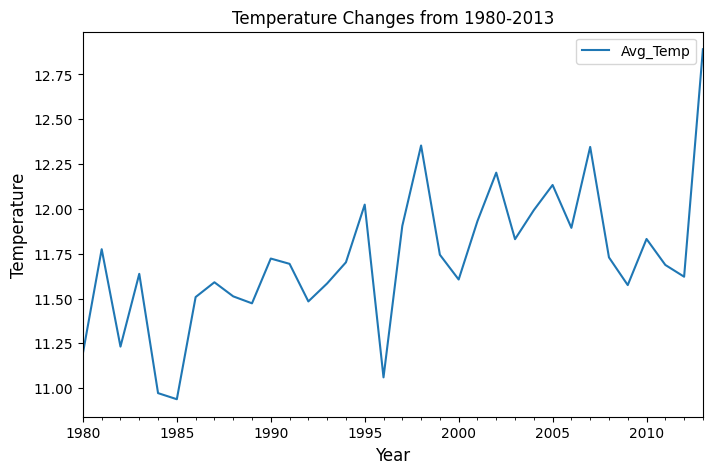

In [23]:
resample_df.plot(title='Temperature Changes from 1980-2013',figsize=(8,5))
plt.ylabel('Temperature', fontsize=12)
plt.xlabel('Year',fontsize=12)
plt.legend()

In [24]:
from statsmodels.tsa.stattools import adfuller
print('Dickey Fuller Test Results: ')
test_df=adfuller(resample_df.iloc[:,0].values,autolag='AIC')
df_output=pd.Series(test_df[0:4],index=['Test Statistic', 'p-value','Lags Used','No of Observations Used'])
for key,value in test_df[4].items():
    df_output['Critical Value (%s)' %key]=value
print(df_output)

Dickey Fuller Test Results: 
Test Statistic             -3.629288
p-value                     0.005225
Lags Used                   0.000000
No of Observations Used    33.000000
Critical Value (1%)        -3.646135
Critical Value (5%)        -2.954127
Critical Value (10%)       -2.615968
dtype: float64


<Figure size 600x500 with 0 Axes>

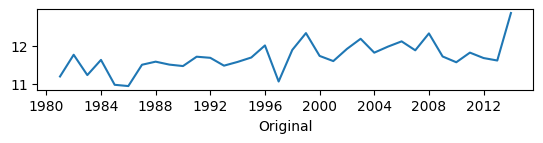

<Figure size 600x500 with 0 Axes>

In [28]:
plt.subplot(411)
plt.plot(resample_df)
plt.xlabel('Original')
plt.figure(figsize=(6,5))